<a href="https://www.kaggle.com/code/devodry/titanic-my-submission-notebook?scriptVersionId=195063413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


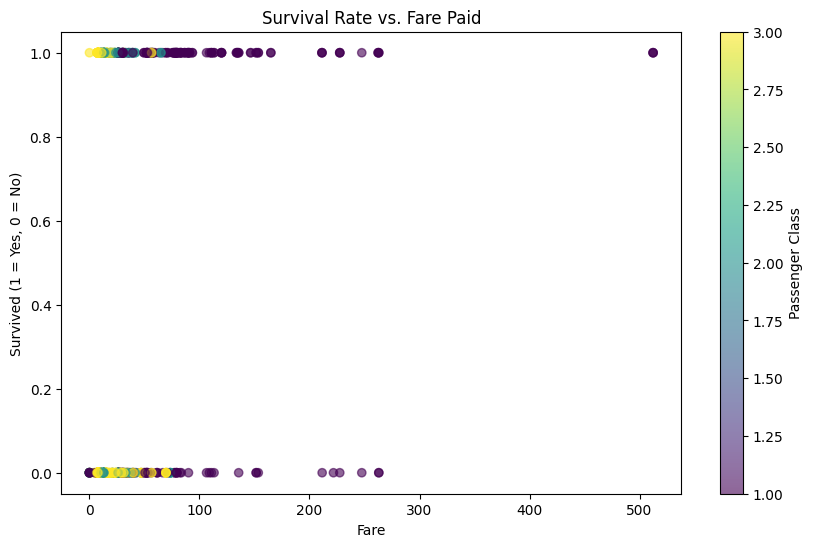

In [3]:
# Survival Rate vs. Fare Paid
# I have seen others group fare cost into levels.  I might try quartiles

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Fare'], df['Survived'], c=df['Pclass'], alpha=0.6)
plt.xlabel('Fare')
plt.ylabel('Survived (1 = Yes, 0 = No)')
plt.title('Survival Rate vs. Fare Paid')
_ = plt.colorbar(label='Passenger Class')

In [4]:
# look at fare cost and try to use quartiles to put passengers into groups
quartiles = df['Fare'].quantile([0.25, 0.5, 0.75])
print(quartiles)

# Hummm.  Well, not sure that got me what I was looking for.

0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64


# New Section

# Create list

In [5]:
# OK I will run some descriptive data that might tell me something
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [7]:
# Looks like I have alot of nulls under cabin and age and 2 under embarked.
# I believe I may need cabin right I mean if your cabin was way in the bottom
# probably not good.
# OK let me look at some more correlation graphs

correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [8]:
# Looks like I need to do something with my non-numberic data
# At least the features I want, then rerun the correlation matrix

df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)
test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   
Embarked       -0.030555  0.108669  0.043835  0.118593  0.012186 -0.060606   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030555  
Survived     0.081629  0.257307  0.108669  
Pclass       0.018443 -0.549500  0.043835  
Sex          0.245489  0.182333  0.118593  

In [9]:
# My 3 highest correlations to survival were Sex, Pclass, and Fare
# In that order
# Could I feature engineer something with embarked?  Let's try

#df ['Embarked_Fare'] = df['Embarked'] * df['Fare]

# One second thought this is not going to give me really anything.
# I think I still want to segregate Fare into bins.
import numpy as np
# Define the bin edges
bins = [0, 10, 20, 30, 40, 50, 100, 150, 200]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

# Create a new column 'Fare_bin' with the binned data
df['Fare_bin'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
df['Fare_bin'] = pd.to_numeric(df['Fare_bin'], errors='coerce')
test_df['Fare_bin'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
test_df['Fare_bin'] = pd.to_numeric(df['Fare_bin'], errors='coerce')

# Display the DataFrame
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [10]:
correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   
Embarked       -0.030555  0.108669  0.043835  0.118593  0.012186 -0.060606   
Fare_bin        0.000894  0.314939 -0.726693  0.233185  0.151358  0.330210   

                Parch      Fare  Embarked  Fare_bin  
PassengerId -0.001652  0.012658 -0.030555  0.000894  
Survived     0.081629  0.257307  

In [11]:
# Hummmm my Fare_bin df must not be numerical

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
 12  Fare_bin     871 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 90.6+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

In [12]:
# Let me now drop the rest of the data

df = df.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [13]:

correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

          Survived    Pclass       Sex  Fare_bin
Survived  1.000000 -0.338481  0.543351  0.314939
Pclass   -0.338481  1.000000 -0.131900 -0.726693
Sex       0.543351 -0.131900  1.000000  0.233185
Fare_bin  0.314939 -0.726693  0.233185  1.000000


In [14]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Fare_bin  871 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB
Survived     0
Pclass       0
Sex          0
Fare_bin    20
dtype: int64


In [15]:
# Remove rows
df.dropna(subset=['Fare_bin'], inplace=True)
test_df.dropna(subset=['Fare_bin'], inplace=True)

print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Fare_bin    0
dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
X = df[['Pclass', 'Sex', 'Fare_bin']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7634
Random Forest Accuracy: 0.7595
Gradient Boosting Accuracy: 0.7634
AdaBoost Accuracy: 0.7901
Support Vector Machine Accuracy: 0.8015


In [18]:
import joblib
model = SVC(random_state=42)
model.fit(X_train, y_train)

model_name = 'titanicSVC'

joblib.dump(model, 'titanicSVC.pkl')


['titanicSVC.pkl']